In [ ]:
# data processing
import pandas as pd

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

# Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler



---



---






**Data Collection**

In [ ]:
# Function untuk mengecek apakah file csv valid atau tidak
def check_csv_integrity(file_path):
    try:
        df = pd.read_csv(file_path)
        print(f"Integrity check passed. The CSV file at {file_path} is valid.")
    except pd.errors.EmptyDataError:
        print(f"Integrity check failed. The CSV file at {file_path} is empty or invalid.")
    except pd.errors.ParserError:
        print(f"Integrity check failed. Error parsing the CSV file at {file_path}.")

check_csv_integrity('/content/Hotel_Reservations.csv')

Integrity check passed. The CSV file at /content/Hotel_Reservations.csv is valid.


In [ ]:
df = pd.read_csv('/content/Hotel_Reservations.csv')
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2.0,0.0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2.0,0.0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1.0,0.0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2.0,0.0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2.0,0.0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36272 non-null  float64
 2   no_of_children                        36270 non-null  float64
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

Deskripsi Variabel:

*   Booking_ID: ID tamu yang melakukan reservasi.
*   no_of_adults: Jumlah tamu orang dewasa.
*   no_of_children: Jumlah tamu anak-anak.
*   no_of_weekend_nights: Jumlah malam akhir pekan (Sabtu atau Minggu) tamu menginap atau memesan untuk menginap di hotel.
*   no_of_week_nights: Jumlah malam dalam seminggu (Senin hingga Jumat) tamu menginap atau memesan untuk menginap di hotel.
*   type_of_meal_plan: tipe makanan yang dipesan.
*   required_car_parking_space: Apakah tamu membutuhkan tempat parkir mobil? (0) untuk tidak, (1) untuk iya.
*   room_type_reserved: Tipe kamar yang dipesan oleh tamu. Nilai dikodekan oleh INN Hotels.
*   lead_time: jumlah hari antara tanggal pemesanan dan tanggal kedatangan tamu.
*   arrival_year: Tahun kedatangan tamu.
*   arrival_month: Bulan kedatangan tamu.
*   arrival_date: Tanggal kedatangan tamu.
*   market_segment_type: Tipe segmen pasar atau penetapan segmen pasar..
*   repeated_guest: Apakah tamu merupakan tamu berulang?, (0) untuk tidak, (1) untuk iya.
*   no_of_previous_cancellations: Jumlah pemesanan sebelumnya yang dibatalkan oleh pelanggan sebelumnya, sebelum pemesanan saat ini
*   no_of_previous_bookings_not_canceled: Jumlah pemesanan sebelumnya yang tidak dibatalkan oleh pelanggan sebelumnya, sebelum pemesanan saat ini
*   avg_price_per_room: Tarif rata-rata per hari pemesanan, harga kamar bersifat dinamis. (dalam euro)
*   no_of_special_requests: Jumlah total permintaan khusus yang dibuat oleh tamu (mis. lantai yang tinggi, pemandangan dari kamar, dll.)
*   booking_status: apakah reservasi dibatalkan? (0) untuk tidak, (1) untuk iya.



---



---





**Data Cleaning**

In [ ]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            3
no_of_children                          5
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     4
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
nums = [kolom for kolom, tipe_data in df.dtypes.items() if tipe_data in ['int64', 'float64']]
cats = [kolom for kolom, tipe_data in df.dtypes.items() if tipe_data == 'object']
target = cats.index('booking_status')

In [ ]:
df[nums].describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36272.000000,36270.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.847182,0.105294,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.568874,0.402674,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,30.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


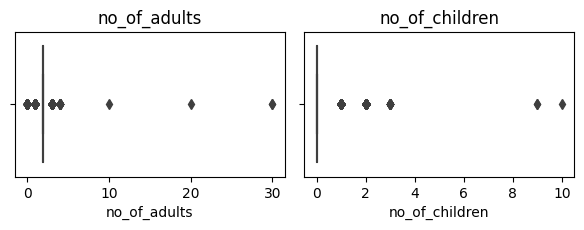

In [ ]:
# Membuat subplot box plot untuk data variabel null bertipe numerik
null_variable = 'no_of_adults', 'no_of_children'

plt.figure(figsize=(6, 4))
for i, column in enumerate(null_variable, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x=column)
    plt.title(f'{column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

In [ ]:
# Mengatasi missing value pada fitur bertipe numerik menggunakan median.
df['no_of_adults'].fillna(df['no_of_adults'].median(), inplace=True)
df['no_of_children'].fillna(df['no_of_children'].median(), inplace=True)

In [ ]:
# Menghitung 'count' pada variabel data numerik
for i in df[nums]:
    print(f"Value count kolom {i}: \n{df[i].value_counts()} \n")

Value count kolom no_of_adults: 
2.0     26107
1.0      7694
3.0      2315
0.0       139
4.0        16
30.0        2
20.0        1
10.0        1
Name: no_of_adults, dtype: int64 

Value count kolom no_of_children: 
0.0     33577
1.0      1618
2.0      1058
3.0        19
9.0         2
10.0        1
Name: no_of_children, dtype: int64 

Value count kolom no_of_weekend_nights: 
0    16872
1     9995
2     9071
3      153
4      129
5       34
6       20
7        1
Name: no_of_weekend_nights, dtype: int64 

Value count kolom no_of_week_nights: 
2     11444
1      9488
3      7839
4      2990
0      2387
5      1614
6       189
7       113
10       62
8        62
9        34
11       17
15       10
12        9
14        7
13        5
17        3
16        2
Name: no_of_week_nights, dtype: int64 

Value count kolom required_car_parking_space: 
0    35151
1     1124
Name: required_car_parking_space, dtype: int64 

Value count kolom lead_time: 
0      1297
1      1078
2       643
3       630
4 

In [ ]:
df[cats].describe()

,Booking_ID,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status
count,36275,36275,36275,36271,36275
unique,36275,4,7,5,2
top,INN00001,Meal Plan 1,Room_Type 1,Online,Not_Canceled
freq,1,27835,28130,23211,24390


In [ ]:
# Menghitung 'count' pada variabel data kategorik
for i in df[cats]:
    print(f"Value count kolom {i}:\n{df[i].value_counts()}\n")

Value count kolom Booking_ID:
INN00001    1
INN24187    1
INN24181    1
INN24182    1
INN24183    1
           ..
INN12086    1
INN12085    1
INN12084    1
INN12083    1
INN36275    1
Name: Booking_ID, Length: 36275, dtype: int64

Value count kolom type_of_meal_plan:
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64

Value count kolom room_type_reserved:
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64

Value count kolom market_segment_type:
Online           23211
Offline          10527
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64

Value count kolom booking_status:
Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64



In [ ]:
# Mengatasi missing values pada fitur bertipe objek atau kategorik.
df['market_segment_type'].fillna(df['market_segment_type'].mode()[0], inplace=True)



---



---




Data Exploration

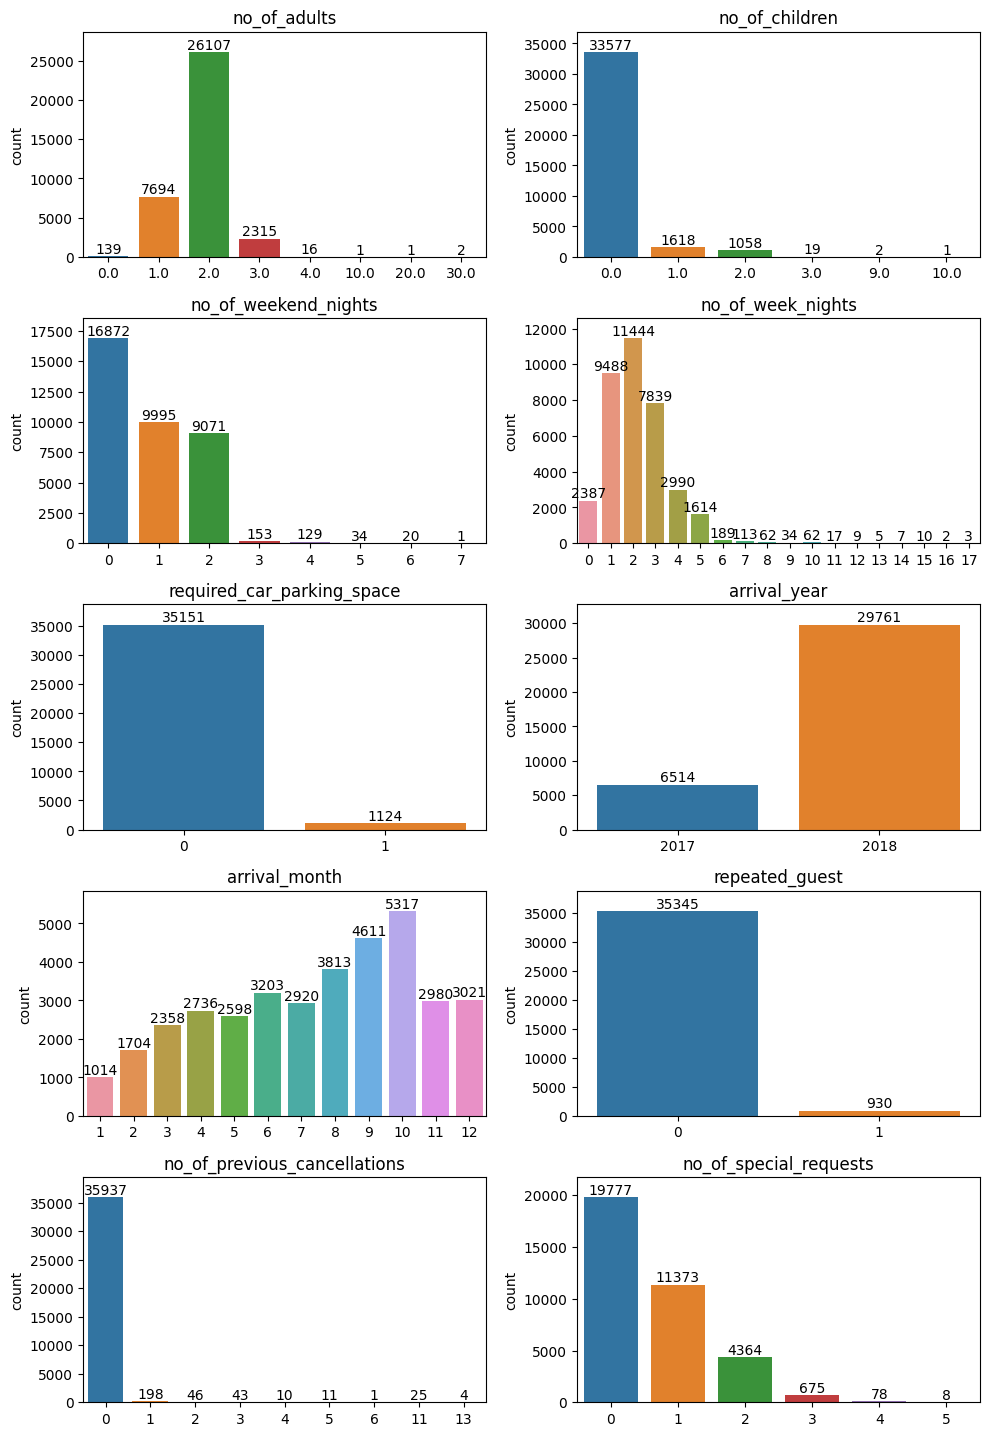

In [ ]:
# Membuat grafik histogram untuk semua variabel bertipe numerik yang dipilih.
nums_selected_cols = [i for i in nums if i not in ['lead_time', 'arrival_date', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room']]

plt.figure(figsize=(10, 40))
for i, col in enumerate(nums_selected_cols):
    ax = plt.subplot(14, 2, i+1)
    sns.countplot(x=df[col])
    plt.title(col)
    plt.xlabel(None)
    for container in ax.containers:
      ax.bar_label(container)
    ax.margins(y=0.1)

plt.tight_layout()
plt.show()

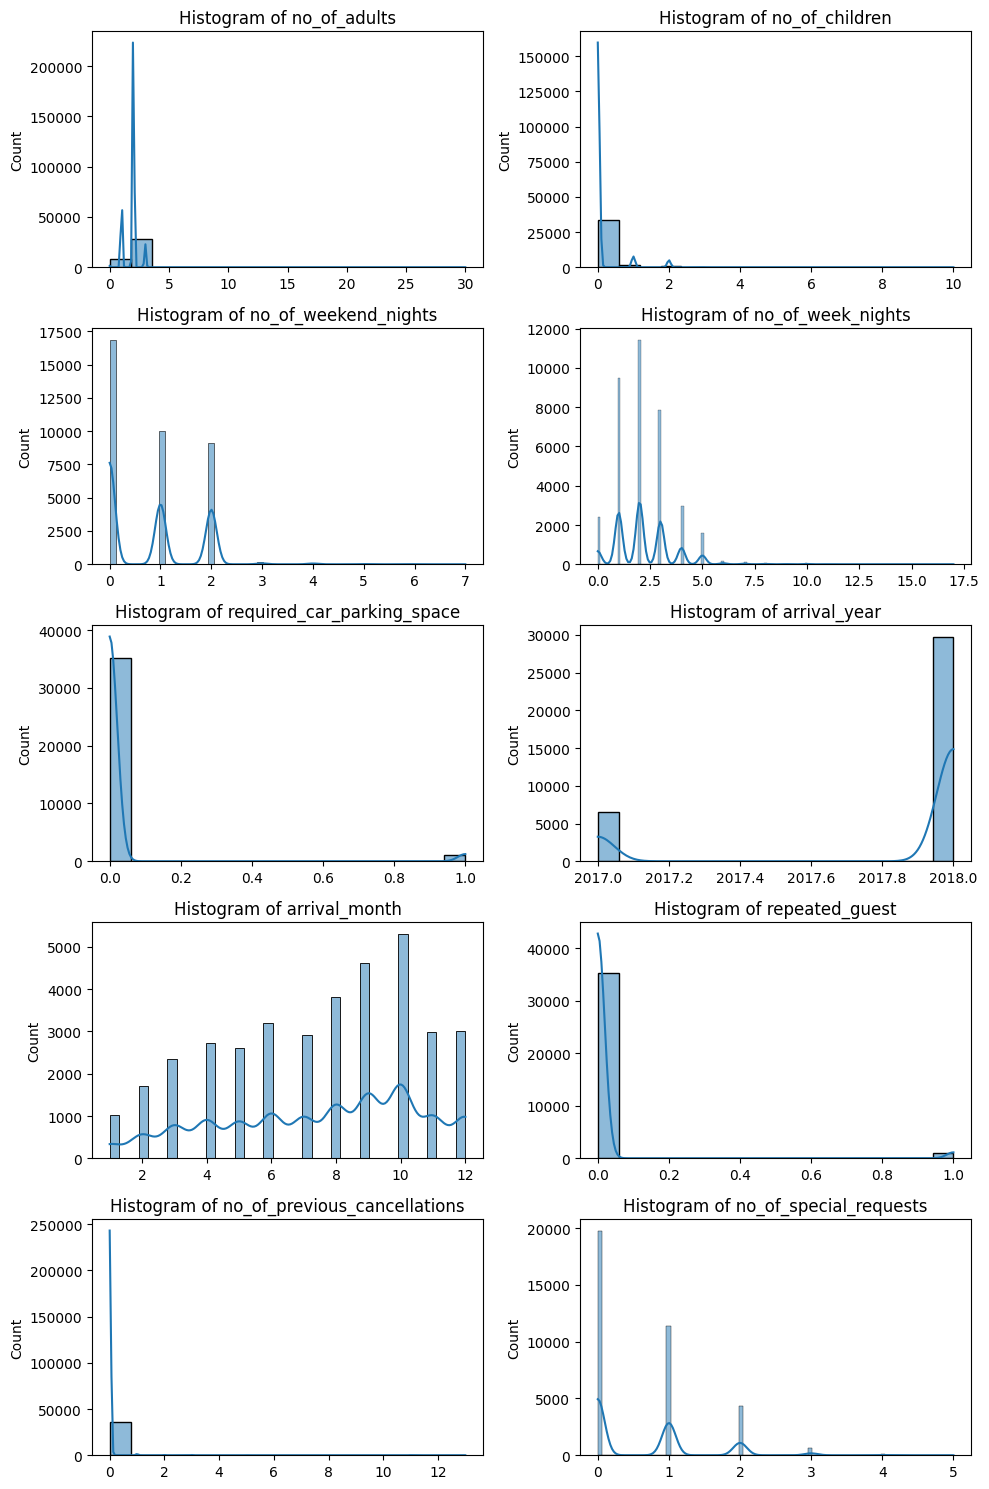

In [ ]:
# Membuat subplot untuk histogram
plt.figure(figsize=(10, 15))
for i, column in enumerate(nums_selected_cols, 1):
    plt.subplot(5, 2, i)
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(None)

plt.tight_layout()
plt.show()

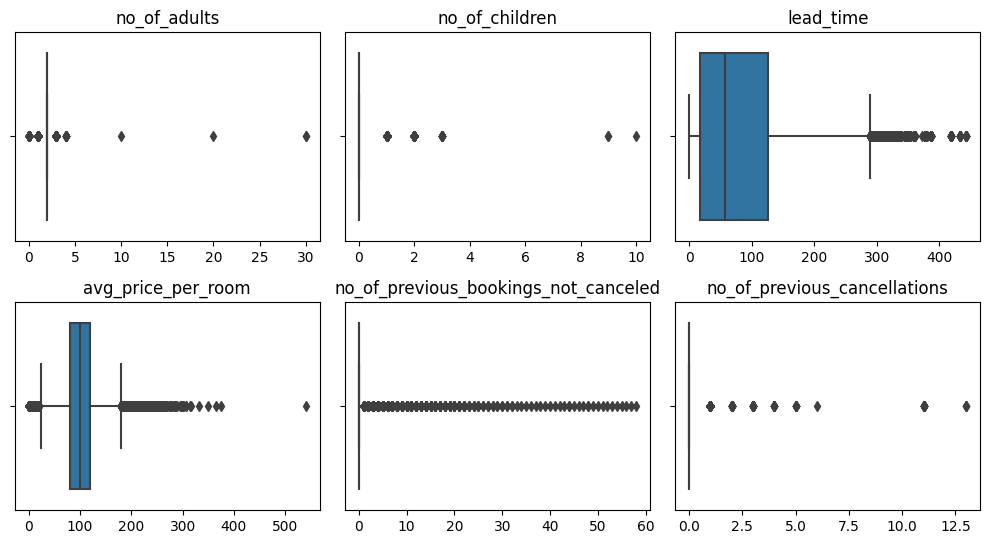

In [ ]:
# Memilih variable yang ingin dibuat box plot
columns_to_plot = ['no_of_adults', 'no_of_children', 'lead_time', 'avg_price_per_room', 'no_of_previous_bookings_not_canceled', 'no_of_previous_cancellations']

# Membuat subplot untuk box plot
plt.figure(figsize=(10, 8))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, x=column)
    plt.title(column)
    plt.xlabel(None)

plt.tight_layout()
plt.show()

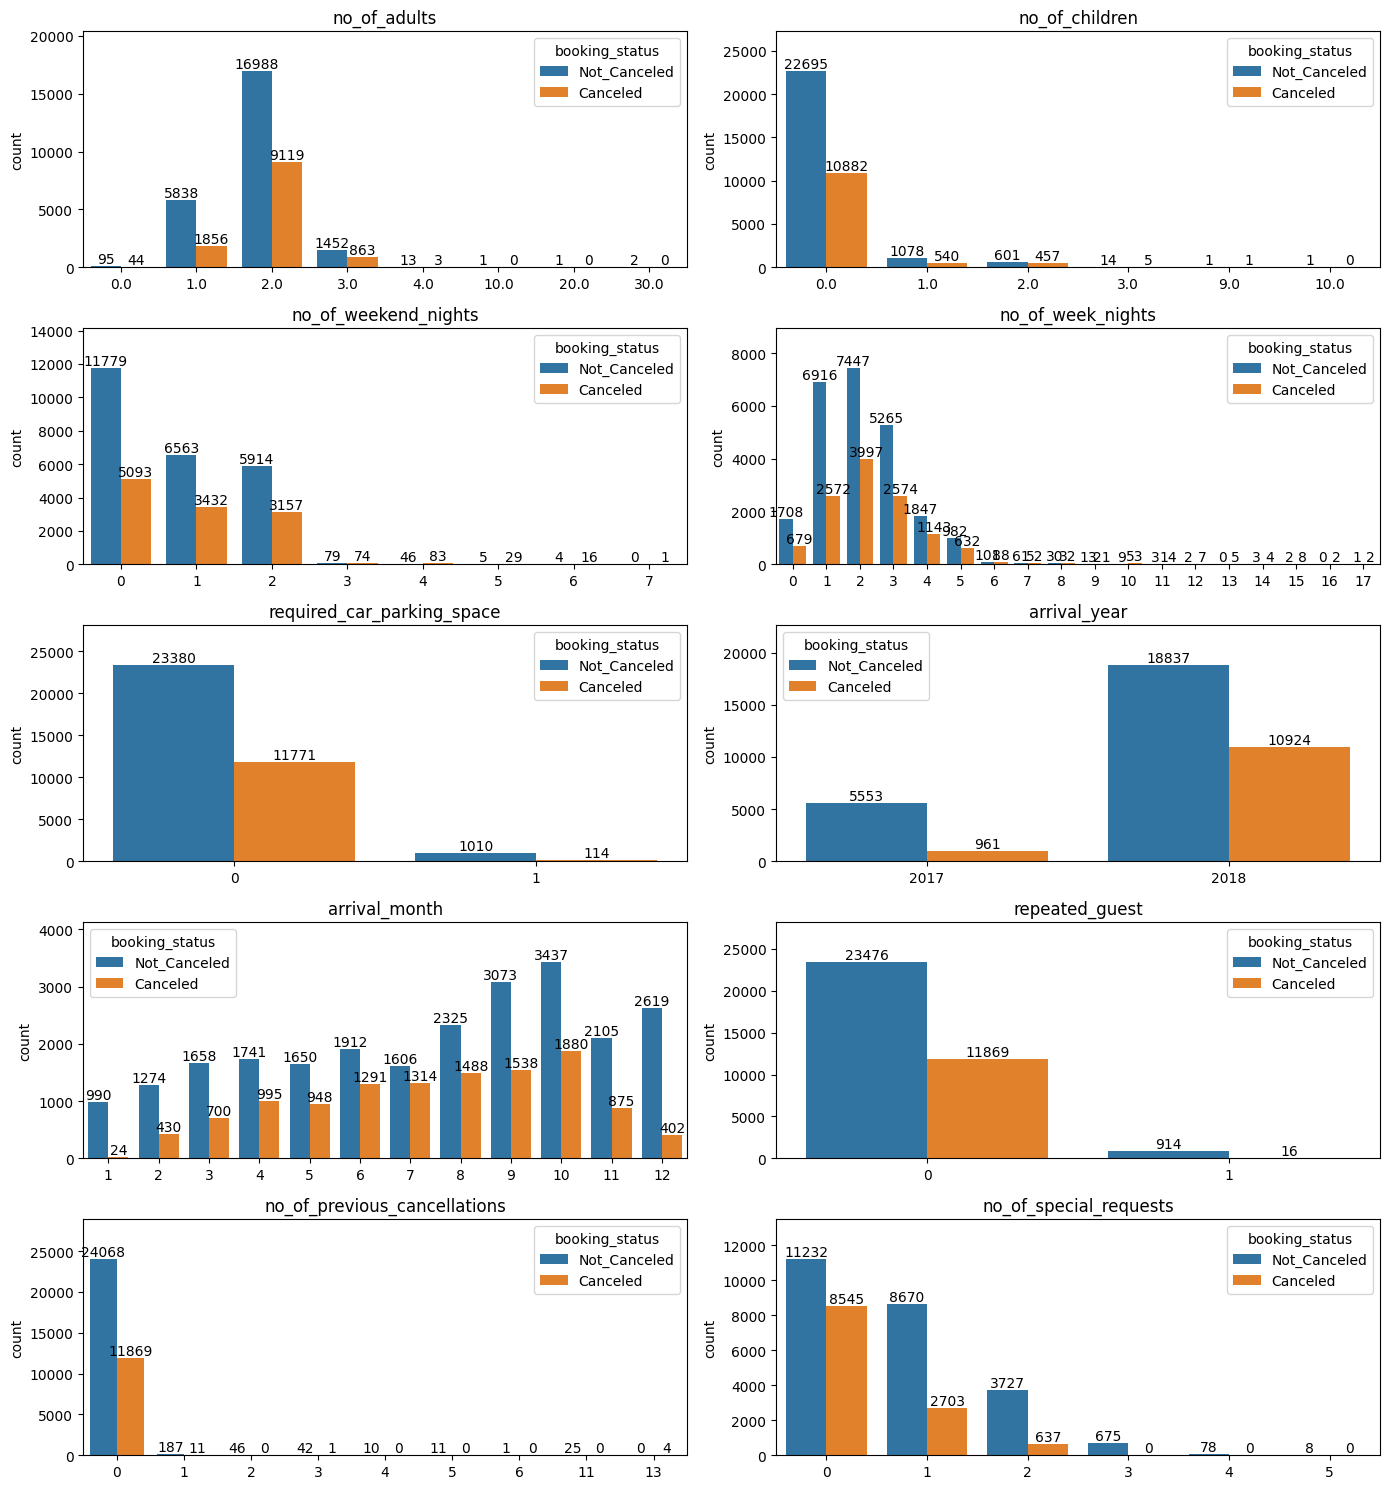

In [ ]:
# Membuat grafik histogram untuk variabel target berdasarkan data numerik
plt.figure(figsize=(14, 15))
for i, col in enumerate(nums_selected_cols):
    ax = plt.subplot2grid((5, 2), (i // 2, i % 2), rowspan=1, colspan=1)
    sns.countplot(x=df[col], hue=df['booking_status'])
    plt.title(col)
    plt.xlabel(None)
    for container in ax.containers:
      ax.bar_label(container)
    ax.margins(y=0.2)

plt.tight_layout()
plt.show()

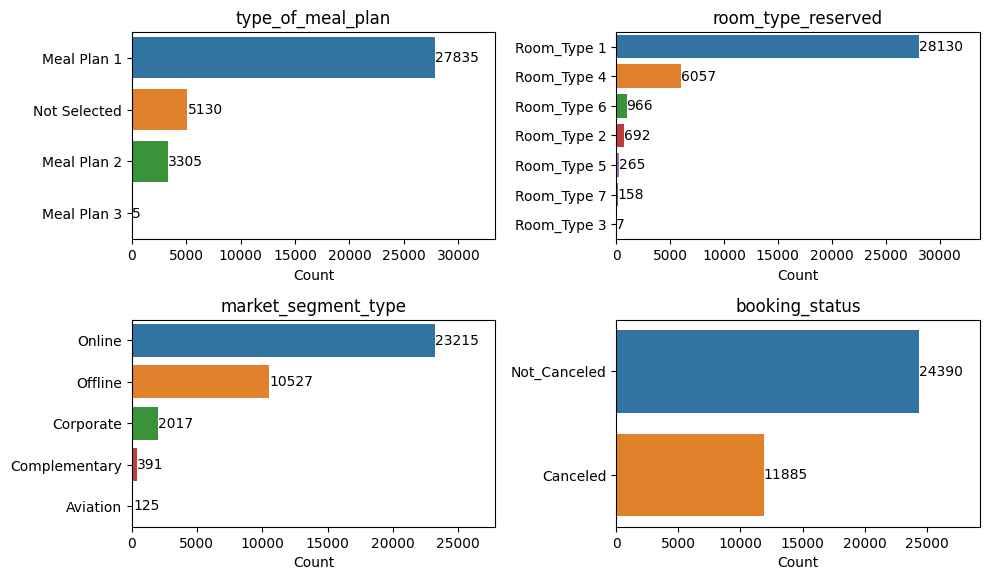

In [ ]:
# Membuat grafik histogram untuk variabel bertipe kategorik.
cats_without_id = [i for i in cats if i != 'Booking_ID']

plt.figure(figsize=(10, 40))
for i, col in enumerate(cats_without_id):
    ax = plt.subplot(14, 2, i+1)
    sns.countplot(y=df[col], order=df[col].value_counts().index)  # Menggunakan 'col' di sini sebagai variabel iterasi
    plt.title(col)
    plt.xlabel("Count")
    plt.ylabel(None)
    for container in ax.containers:
      ax.bar_label(container)
    ax.margins(x=0.2)
    plt.tight_layout()

plt.show()

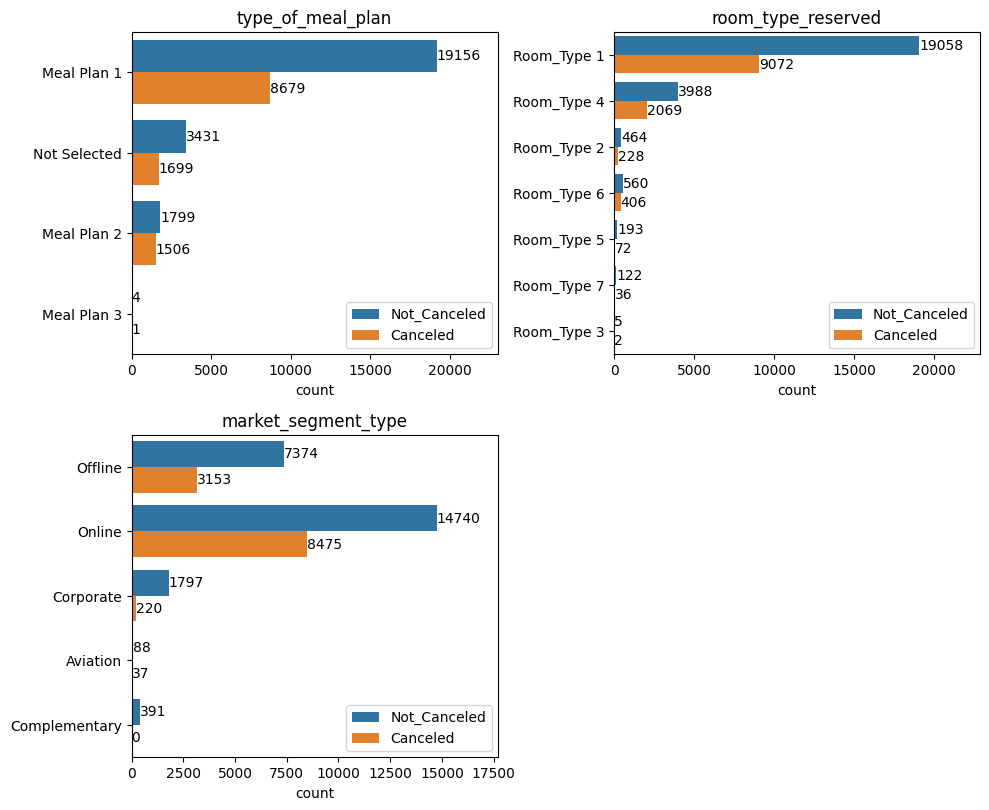

In [ ]:
# Membuat grafik histogram untuk variabel target berdasarkan data kategorik
cats_without_status = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']

plt.figure(figsize=(10, 40))
for i, col in enumerate(cats_without_status):
    ax = plt.subplot(10, 2, i + 1)
    sns.countplot(y=df[col], hue=df['booking_status'])
    plt.title(col)
    plt.ylabel(None)
    plt.legend(loc='lower right', bbox_to_anchor=(1.0, 0.0), borderaxespad=0.4)
    for container in ax.containers:
      ax.bar_label(container)
    ax.margins(x=0.2)

plt.tight_layout()
plt.show()

<Axes: xlabel='avg_price_per_room', ylabel='lead_time'>

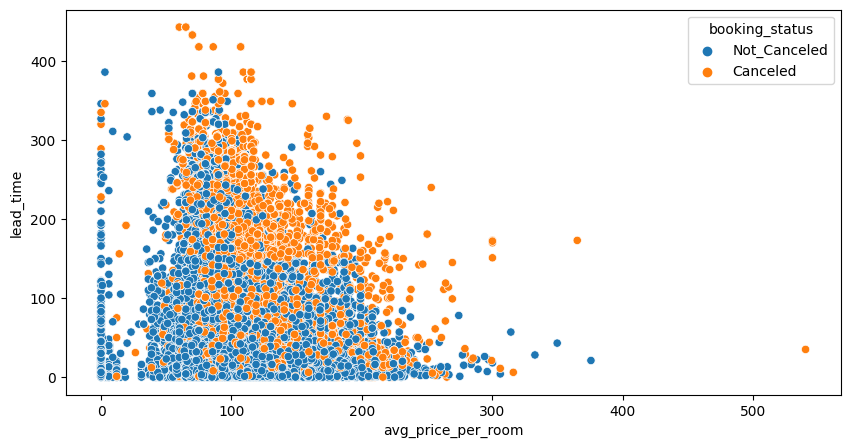

In [ ]:
plt.figure(figsize = (10,5))
sns.scatterplot(x='avg_price_per_room',y='lead_time',data=df,hue='booking_status')

Berdasarkan scatter plot di atas, kesimpulan yang dapat ditarik adalah bahwa kemungkinan pembatalan reservasi meningkat seiring dengan peningkatan lead_time. Pengaruh avg_price_per_room terhadap booking_status baru terlihat setelah lead_time mencapai titik tertentu.

Pada grafik ini, misalnya jika lead_time di atas 100, nilai avg_price_per_room juga akan semakin tinggi, hal ini bisa dilihat berdasarkan warna labelling Booking_status. Alasan inilah yang mendasari beberapa pelanggan melakukan pembatalan terhadap pemesanan hotel.

array([<Axes: ylabel='count'>], dtype=object)

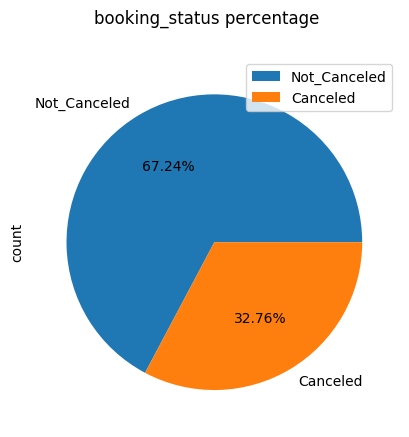

In [ ]:
df.groupby('booking_status')['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False).plot(kind='pie',autopct='%1.2f%%',subplots=True,title='booking_status percentage')

<ipython-input-25-4629bc87a4bd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


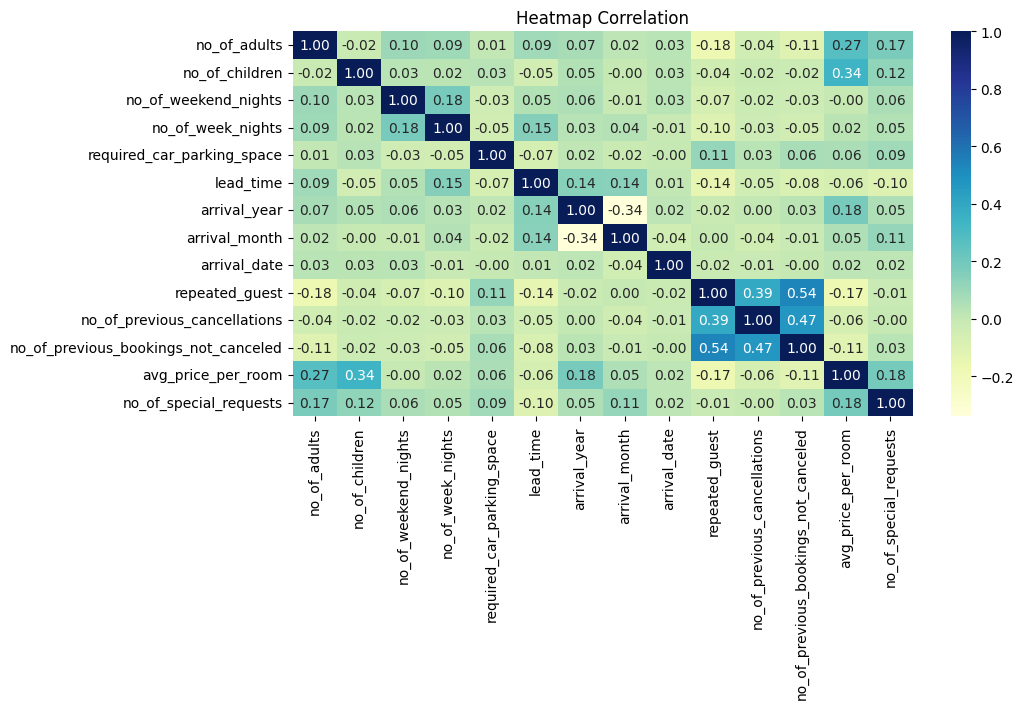

In [ ]:
# Menghitung korelasi antar variabel
correlation = df.corr()

# Membuat heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(correlation, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Heatmap Correlation")
plt.show()



---



---



**Preparation**

In [ ]:
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2.0,0.0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2.0,0.0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1.0,0.0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2.0,0.0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2.0,0.0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3.0,0.0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2.0,0.0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2.0,0.0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2.0,0.0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [ ]:
df.drop(columns = 'Booking_ID', inplace=True)
cats = [kolom for kolom, tipe_data in df.dtypes.items() if tipe_data == 'object']
print(cats)
nums

['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']


['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'required_car_parking_space',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests']

In [ ]:
# Define a threshold for Z-score to identify outliers
z_score_threshold = 5

# Function to identify outliers using Z-score for a specific attribute
def find_outliers(data, attribute, threshold):
    z_scores = ((data[attribute] - data[attribute].mean()) / data[attribute].std()).abs()
    return z_scores > threshold

# Identify outliers for each parameter
outliers_adults = find_outliers(df, 'no_of_adults', z_score_threshold)
outliers_children = find_outliers(df, 'no_of_children', z_score_threshold)

# Display the outliers for each parameter
print("Outliers for no_of_adults:")
print(df['no_of_adults'][outliers_adults])

print("Outliers for no_of_children:")
print(df['no_of_children'][outliers_children])

Outliers for no_of_adults:
26     20.0
124    30.0
305    30.0
540    10.0
Name: no_of_adults, dtype: float64
Outliers for no_of_children:
5657      3.0
6338     10.0
10041     9.0
10061     9.0
11530     3.0
13297     3.0
16030     3.0
17532     3.0
18734     3.0
20796     3.0
20805     3.0
22196     3.0
22773     3.0
24454     3.0
24562     3.0
24683     3.0
25775     3.0
26435     3.0
27693     3.0
30151     3.0
32611     3.0
34087     3.0
Name: no_of_children, dtype: float64


In [ ]:
# Menghapus data outlier
df = df[~outliers_adults]
df = df[~outliers_children]
df

<ipython-input-29-405d73c09e2c>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[~outliers_children]


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2.0,0.0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2.0,0.0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1.0,0.0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2.0,0.0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2.0,0.0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3.0,0.0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,2.0,0.0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,2.0,0.0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,2.0,0.0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


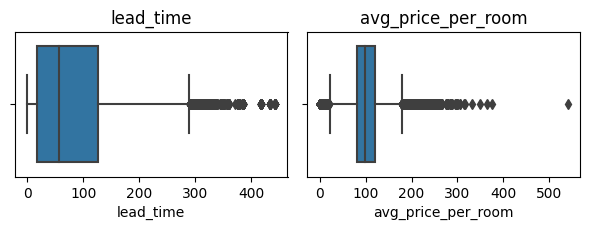

In [ ]:
# Membuat subplot box plot pada variabel yang dipilih
variable = 'lead_time', 'avg_price_per_room'

plt.figure(figsize=(6, 4))
for i, column in enumerate(variable, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x=column)
    plt.title(f'{column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

Berdasarkan boxplot di atas:

*   Nilai outlier pada kedua variabel tersebut tidak saya handle karena data tersebut merupakan data asli dan histori (bukan error/misinput). Sehingga, data akan dilakukan training dengan outlier untuk dapat memprediksi



In [ ]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [ ]:
# melakukan label encoding untuk data kategorik
df[cats]=df[cats].apply(LabelEncoder().fit_transform)
for i in cats:
    print(f"Value count kolom {i}:\n{df[i].value_counts()}\n")

Value count kolom type_of_meal_plan:
0    27812
3     5130
1     3302
2        5
Name: type_of_meal_plan, dtype: int64

Value count kolom room_type_reserved:
0    28126
3     6054
5      961
1      686
4      265
6      150
2        7
Name: room_type_reserved, dtype: int64

Value count kolom market_segment_type:
4    23195
3    10525
2     2016
1      388
0      125
Name: market_segment_type, dtype: int64

Value count kolom booking_status:
1    24370
0    11879
Name: booking_status, dtype: int64



In [ ]:
# melakukan one-hot encoding untuk variabel arrival_year.
df = pd.get_dummies(df, columns=['arrival_year'])
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,arrival_year_2017,arrival_year_2018
0,2.0,0.0,1,2,0,0,0,224,10,2,3,0,0,0,65.00,0,1,1,0
1,2.0,0.0,2,3,3,0,0,5,11,6,4,0,0,0,106.68,1,1,0,1
2,1.0,0.0,2,1,0,0,0,1,2,28,4,0,0,0,60.00,0,0,0,1
3,2.0,0.0,0,2,0,0,0,211,5,20,4,0,0,0,100.00,0,0,0,1
4,2.0,0.0,1,1,3,0,0,48,4,11,4,0,0,0,94.50,0,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36249 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36249 non-null  float64
 1   no_of_children                        36249 non-null  float64
 2   no_of_weekend_nights                  36249 non-null  int64  
 3   no_of_week_nights                     36249 non-null  int64  
 4   type_of_meal_plan                     36249 non-null  int64  
 5   required_car_parking_space            36249 non-null  int64  
 6   room_type_reserved                    36249 non-null  int64  
 7   lead_time                             36249 non-null  int64  
 8   arrival_month                         36249 non-null  int64  
 9   arrival_date                          36249 non-null  int64  
 10  market_segment_type                   36249 non-null  int64  
 11  repeated_guest 

In [ ]:
X = df.drop('booking_status',axis=1)
Y = df['booking_status']

X_train,X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
X_train

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,arrival_year_2017,arrival_year_2018
25748,2.0,0.0,2,3,0,0,0,292,12,30,4,0,0,0,91.79,0,0,1
25816,2.0,0.0,0,2,0,0,0,59,12,23,4,0,0,0,93.60,0,0,1
6785,2.0,0.0,1,1,0,0,0,188,8,13,4,0,0,0,105.30,0,0,1
22696,2.0,0.0,2,3,3,0,0,2,6,26,3,0,0,0,63.75,0,0,1
32903,2.0,0.0,1,1,0,0,1,217,7,18,4,0,0,0,95.63,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16861,3.0,0.0,0,1,0,1,3,233,10,7,4,0,0,0,168.30,0,0,1
6270,2.0,0.0,0,2,0,0,3,25,6,2,4,0,0,0,148.00,1,0,1
11292,1.0,0.0,0,1,0,0,0,0,2,10,4,0,0,0,85.00,0,0,1
864,2.0,0.0,1,1,0,0,3,11,10,10,3,0,0,0,107.00,0,0,1


In [ ]:
X_test

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,arrival_year_2017,arrival_year_2018
18573,1.0,0.0,2,2,0,0,3,29,6,18,4,0,0,0,130.80,0,0,1
10367,1.0,0.0,2,2,0,0,0,5,11,6,4,0,0,0,151.94,0,0,1
10107,2.0,0.0,0,5,0,0,0,22,5,10,4,0,0,0,142.20,0,0,1
14181,2.0,0.0,2,5,0,0,0,189,10,19,3,0,0,0,72.76,0,0,1
29437,1.0,0.0,1,1,0,0,0,45,11,19,4,0,0,0,86.40,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27361,2.0,0.0,1,2,0,0,0,418,9,26,3,0,0,0,75.00,0,0,1
11486,1.0,0.0,0,3,0,0,0,0,5,10,3,0,0,0,108.80,0,0,1
33761,2.0,0.0,0,2,0,0,0,17,2,19,4,0,0,0,91.00,0,0,1
12359,2.0,0.0,2,7,0,0,3,139,7,13,4,0,0,0,130.99,0,0,1


In [ ]:
print(Y_train)
print()
print(Y_test)

25748    0
25816    0
6785     0
22696    1
32903    0
        ..
16861    0
6270     1
11292    0
864      1
15805    1
Name: booking_status, Length: 25374, dtype: int64

18573    0
10367    0
10107    1
14181    1
29437    0
        ..
27361    0
11486    1
33761    1
12359    0
15329    1
Name: booking_status, Length: 10875, dtype: int64


In [ ]:
# Standard scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
print(X_train)

[[ 0.30179806 -0.26694604  1.36319728 ... -0.78671325 -0.47150102
   0.47150102]
 [ 0.30179806 -0.26694604 -0.93192367 ... -0.78671325 -0.47150102
   0.47150102]
 [ 0.30179806 -0.26694604  0.21563681 ... -0.78671325 -0.47150102
   0.47150102]
 ...
 [-1.62761088 -0.26694604 -0.93192367 ... -0.78671325 -0.47150102
   0.47150102]
 [ 0.30179806 -0.26694604  0.21563681 ... -0.78671325 -0.47150102
   0.47150102]
 [ 0.30179806 -0.26694604 -0.93192367 ...  0.49036832 -0.47150102
   0.47150102]]




---



---


**Modelling**

Nome: Decision Tree



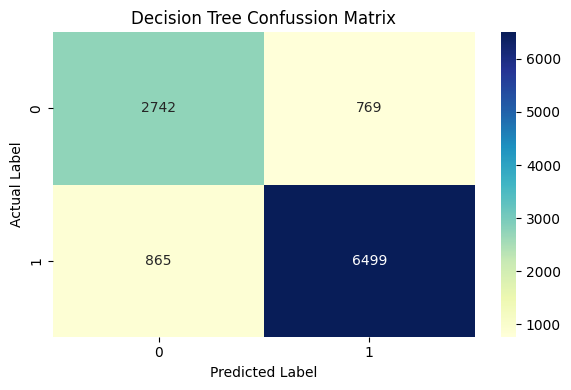


              precision    recall  f1-score   support

           0       0.76      0.78      0.77      3511
           1       0.89      0.88      0.89      7364

    accuracy                           0.85     10875
   macro avg       0.83      0.83      0.83     10875
weighted avg       0.85      0.85      0.85     10875


Nome: Random Forest



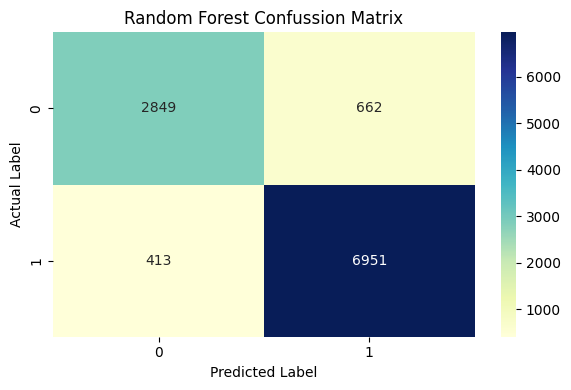


              precision    recall  f1-score   support

           0       0.87      0.81      0.84      3511
           1       0.91      0.94      0.93      7364

    accuracy                           0.90     10875
   macro avg       0.89      0.88      0.88     10875
weighted avg       0.90      0.90      0.90     10875




In [ ]:
models = {
    'Decision Tree':DecisionTreeClassifier(),
    'Random Forest':RandomForestClassifier()
}

for name,model in models.items():
    print('Nome:', name)

    print()

    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    score = model.score(X_test, Y_test)

    cm = confusion_matrix(Y_test,Y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True,fmt='.0f', cmap="YlGnBu")
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.title(f'{name} Confussion Matrix')
    plt.tight_layout()
    plt.show()

    print()

    print(classification_report(Y_test, Y_pred))

    print()

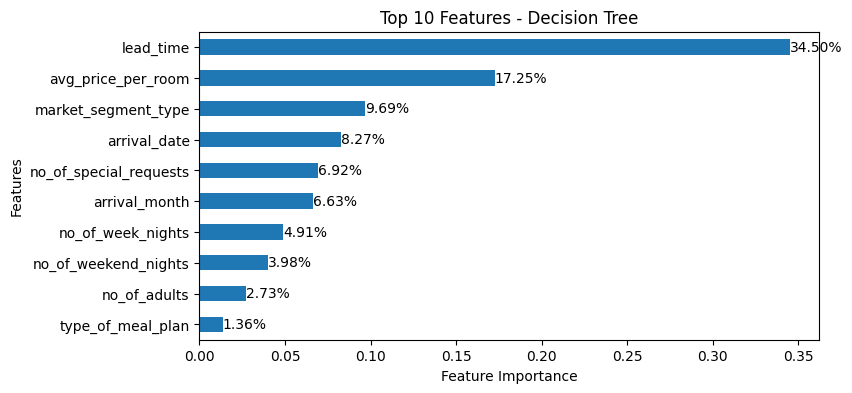

In [ ]:
columns = df.drop('booking_status', axis = 1).columns
feature_dt = pd.Series(models['Decision Tree'].feature_importances_, index =columns).sort_values(ascending = False)

# Menampilkan 10 fitur teratas
top_features = feature_dt.head(10)

# Membuat bar plot
plt.figure(figsize=(8, 4))
top_features.sort_values().plot(kind='barh')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 10 Features - Decision Tree')

# Menambahkan label pada setiap bar
for index, value in enumerate(top_features.sort_values()):
    plt.text(value, index, f'{value:.2%}', va='center', ha='left')

plt.show()

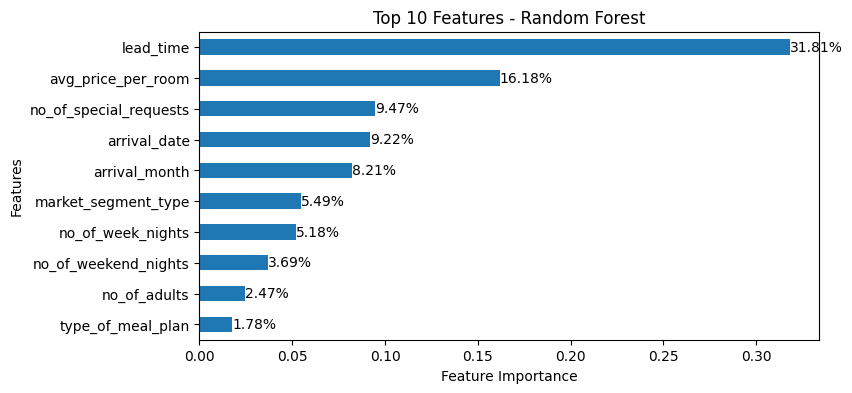

In [ ]:
feature_rf = pd.Series(models['Random Forest'].feature_importances_, index =columns).sort_values(ascending = False)

# Menampilkan 10 fitur teratas
top_features = feature_rf.head(10)

# Membuat bar plot
plt.figure(figsize=(8, 4))
top_features.sort_values().plot(kind='barh')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 10 Features - Random Forest')

# Menambahkan label pada setiap bar
for index, value in enumerate(top_features.sort_values()):
    plt.text(value, index, f'{value:.2%}', va='center', ha='left')

plt.show()

In [ ]:
feature_imp = pd.Series(models['Decision Tree'].feature_importances_, index = columns).sort_values(ascending = False)
feature_imp

lead_time                               0.347184
avg_price_per_room                      0.174861
market_segment_type                     0.096870
arrival_date                            0.082374
no_of_special_requests                  0.069264
arrival_month                           0.064413
no_of_week_nights                       0.047384
no_of_weekend_nights                    0.039452
no_of_adults                            0.027182
type_of_meal_plan                       0.013190
room_type_reserved                      0.010708
arrival_year_2018                       0.008577
arrival_year_2017                       0.007732
required_car_parking_space              0.006050
no_of_children                          0.003570
no_of_previous_bookings_not_canceled    0.000742
no_of_previous_cancellations            0.000296
repeated_guest                          0.000152
dtype: float64